In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityridedata = pd.merge(ridedata, citydata, on="city", how="left")

# Display the data table for preview
cityridedata.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

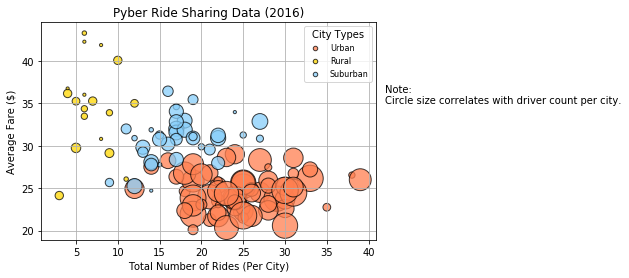

In [2]:
# Obtain the x and y coordinates for each of the three city types

citytype_urban = cityridedata[cityridedata["type"] == "Urban"].groupby([cityridedata["city"]])
citytype_rural = cityridedata[cityridedata["type"] == "Rural"].groupby([cityridedata["city"]])
citytype_suburban = cityridedata[cityridedata["type"] == "Suburban"].groupby([cityridedata["city"]])



# Urban calculations of ride count (x), fare average(y), driver count average(s as in size)
urbanX = citytype_urban["ride_id"].count()
urbanY = citytype_urban["fare"].mean()
urbanS = citytype_urban["driver_count"].mean()

# Rural calculations of ride count (x), fare average(y), driver count average(s as in size)
ruralX = citytype_rural["ride_id"].count()
ruralY = citytype_rural["fare"].mean()
ruralS = citytype_rural["driver_count"].mean()

# Suburban calculations of ride count (x), fare average(y), driver count average(s as in size)
suburbanX = citytype_suburban["ride_id"].count()
suburbanY = citytype_suburban["fare"].mean()
suburbanS = citytype_suburban["driver_count"].mean()


# Build the scatter plots for each city types
plt.scatter(urbanX, urbanY, label = "Urban", s=urbanS * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(ruralX, ruralY, label = "Rural", s=ruralS * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(suburbanX, suburbanY, label = "Suburban", s=suburbanS  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
# Adjust the legend 
legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure

plt.savefig("../Images/PyberRideSharingData.png")#, bbox_inches="tight")

# Show plot
plt.show()


## Total Fares by City Type

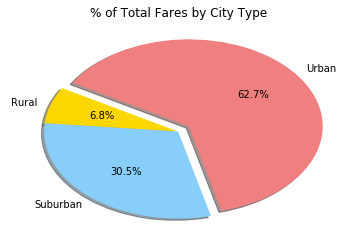

In [3]:
# Calculate Type Percents
type_groupped = cityridedata.groupby(['type'])
fare_sum = type_groupped['fare'].sum()


# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/TotalFaresbyCityType.png")

# show Figure
plt.show()


## Total Rides by City Type

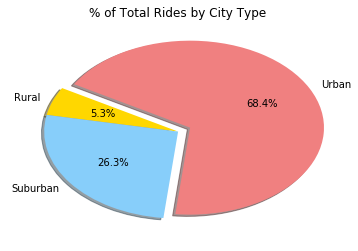

In [4]:
# Calculate Ride Percents
rides_count = type_groupped['ride_id'].count()


# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/TotalRidesbyCityType.png")

# Show Figure
plt.show()


## Total Drivers by City Type

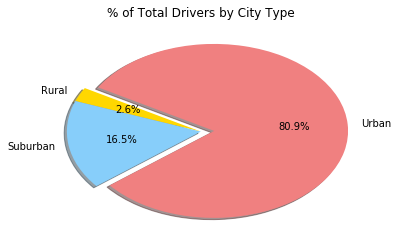

In [5]:
# Calculate Driver Percents
type_groupped_drivers = citydata.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/TotalDriversbyCityType.png")

# Show Figure
plt.show()


#  Three Observable Trends Based on Data Above
    
1.  Clearly the riding sharing is the most high demand/popular in the Urban City Type as

2.  Even though the Urban City Type has the highest market share percentage (62.7%) of Totat Fare and Rural has lowest share      pecentage, however, in term of Total Average Fare by City Type, Urban City has the lowest average of 24.53 dollars and the Rural type has the highest average of 34.60 dollars. The fact that there aren't too many ridesharing in the rual area therefore drivers were able to charge the higher fare price.

3.  Again, Urban City make up the largest percentage of Total Rides By City type, however if you calcualate the Total Average Rides by City type, you will find that their averages are about the equal.